In [1]:
from torchvision import transforms, datasets
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#create images dataset with 224x224 center crop of images resized to be 256 pixels on shortest side
data_transform = transforms.Compose([transforms.Resize(256), transforms.CenterCrop(224), transforms.ToTensor()])
images_dataset = datasets.ImageFolder(root='Images/all/', transform=data_transform)

#print the different image classes
classes = list(images_dataset.classes)
print(classes)


['animals', 'landscape', 'people', 'plants']


In [7]:
#instantiate "empty" arrays for different class average images

animal_arr = np.zeros((224, 224, 3), np.float)
land_arr = np.zeros((224, 224, 3), np.float)
people_arr = np.zeros((224, 224, 3), np.float)
plants_arr = np.zeros((224, 224, 3), np.float)

In [5]:
#loop over images dataset, add values of each image to appropriate average image
#divide by 200 b/c 200 images per class
for i in range(len(images_dataset)):
    img, img_class = images_dataset[i]
    #torchvision puts color in 0th dimension. Have to transpose when converting back to numpy
    img = img.numpy().transpose(1,2,0)
    
    if img_class == 0:
        animal_arr = animal_arr + img/200
    if img_class == 1:
        land_arr = land_arr + img/200
    if img_class == 2:
        people_arr = people_arr + img/200
    if img_class == 3:
        plants_arr = plants_arr + img/200

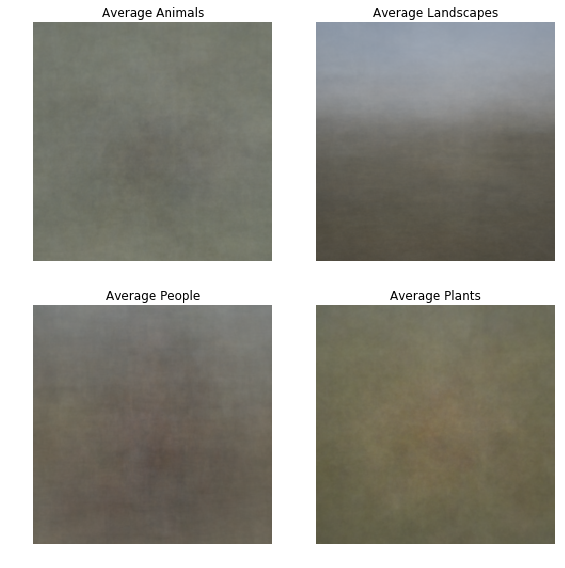

In [6]:

#instantiate 2x2 figure, display average images
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(8,8))

ax1.imshow(animal_arr)
ax1.set_title('Average Animals')
ax1.set_axis_off()

ax2.imshow(land_arr)
ax2.set_title('Average Landscapes')
ax2.set_axis_off()

ax3.imshow(people_arr)
ax3.set_title('Average People')
ax3.set_axis_off()

ax4.imshow(plants_arr)
ax4.set_title('Average Plants')
ax4.set_axis_off()

plt.tight_layout()
plt.show()